# Morphological transformations

In [29]:
# Imports
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [30]:
# Load image
image1 = cv2.imread("../../data/letter_j.png")
image2 = cv2.imread("../../data/opening.png")
image3 = cv2.imread("../../data/closing.png") 

## Dilation

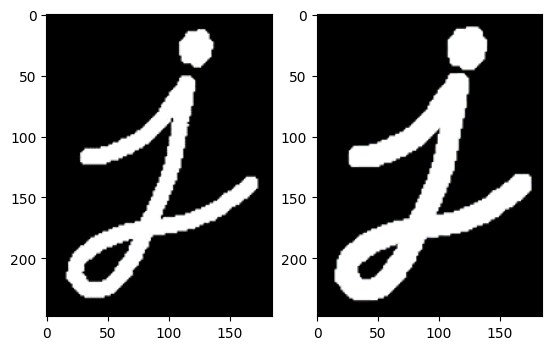

In [31]:
# Dilation
kernel = np.ones((5,5), np.uint8)
dilation = cv2.dilate(image1, kernel, iterations = 1)

# Show images
plt.figure()
plt.subplot(1, 2, 1)
plt.imshow(image1, cmap='gray')
plt.subplot(1, 2, 2)
plt.imshow(dilation, cmap='gray')
plt.show()


## Erosion

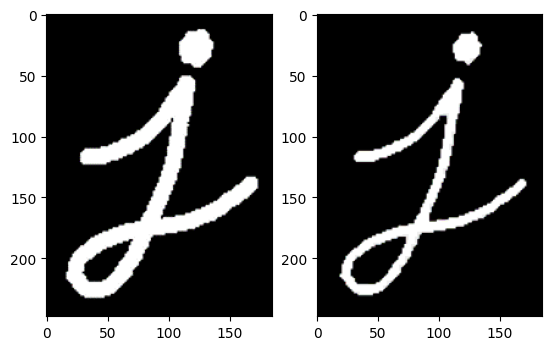

In [32]:
# Erosion
kernel = np.ones((5,5), np.uint8)
erode = cv2.erode(image1, kernel, iterations = 1)

# Show images
plt.figure()
plt.subplot(1, 2, 1)
plt.imshow(image1, cmap='gray')
plt.subplot(1, 2, 2)
plt.imshow(erode, cmap='gray')
plt.show()

## Opening

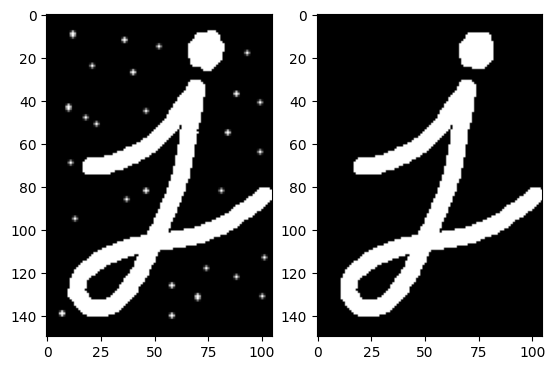

In [33]:
# Opening
kernel = np.ones((5,5), np.uint8)
opening = cv2.morphologyEx(image2, cv2.MORPH_OPEN, kernel)

# Show images
plt.figure()
plt.subplot(1, 2, 1)
plt.imshow(image2, cmap='gray')
plt.subplot(1, 2, 2)
plt.imshow(opening, cmap='gray')
plt.show()

## Closing

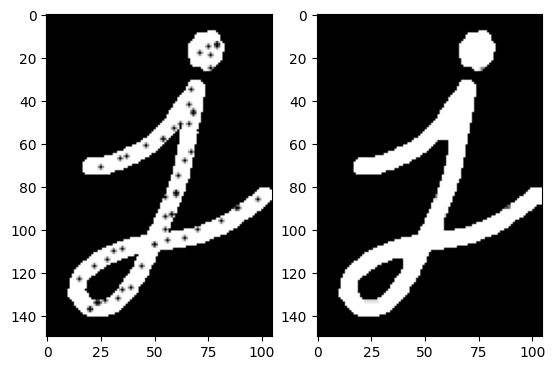

In [34]:
# Closing
kernel = np.ones((5,5), np.uint8)
closing = cv2.morphologyEx(image3, cv2.MORPH_CLOSE, kernel)

# Show images
plt.figure()
plt.subplot(1, 2, 1)
plt.imshow(image3, cmap='gray')
plt.subplot(1, 2, 2)
plt.imshow(closing, cmap='gray')
plt.show()

## Skeletonization

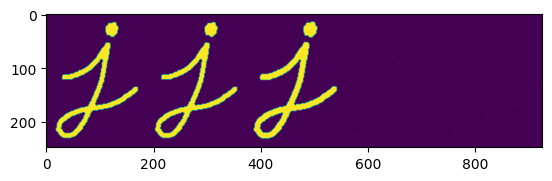

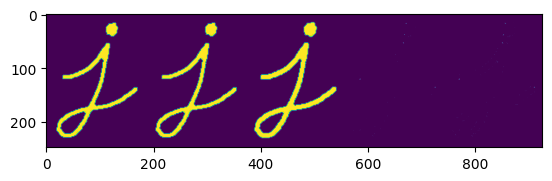

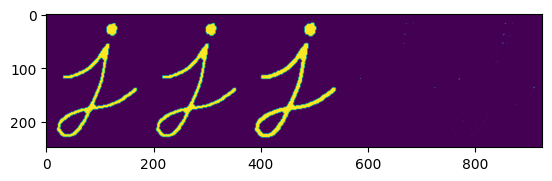

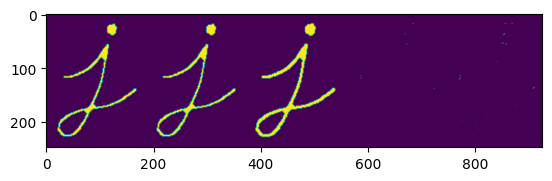

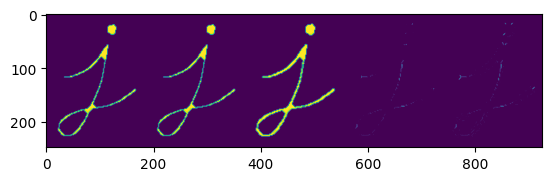

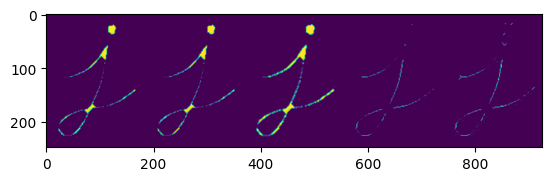

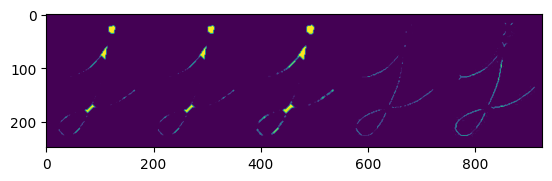

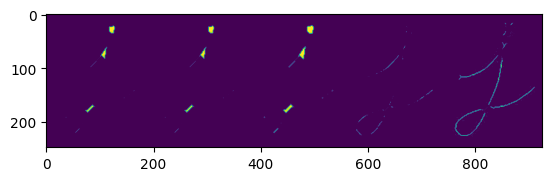

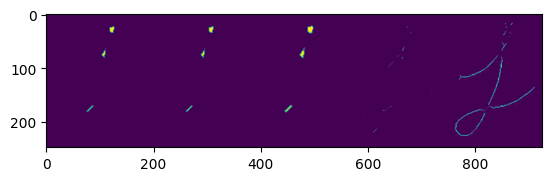

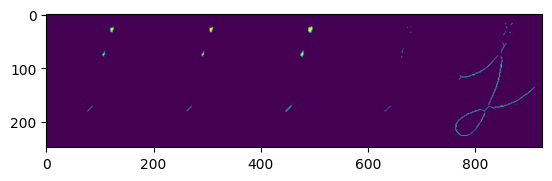

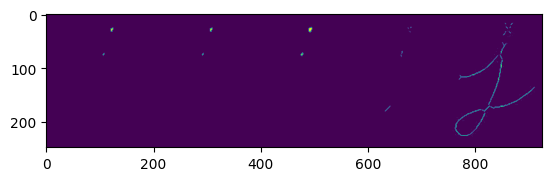

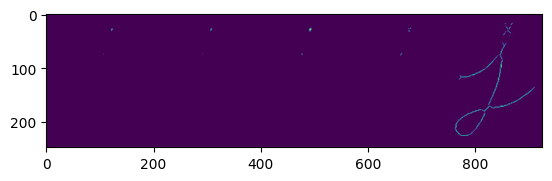

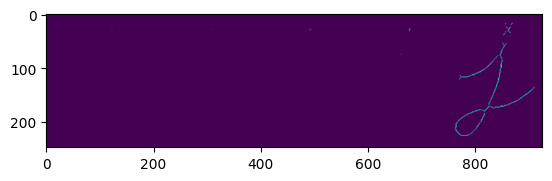

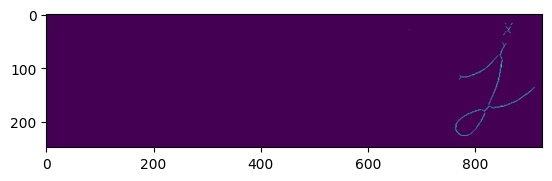

In [37]:
# Convert RGB-image to gray scale image
image1 = cv2.cvtColor(image1, cv2.COLOR_RGB2GRAY)

# Make empty skeleton image
size = np.size(image1)
skel = np.zeros(image1.shape, np.uint8)

# Threshold
ret, image_edit = cv2.threshold(image1, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)

# Skeletonize
element = cv2.getStructuringElement(cv2.MORPH_CROSS, (3, 3))
done = False
while not done:
        
    # Eroding
    eroded = cv2.erode(image1, element)
    
    # Dilating
    dilated = cv2.dilate(eroded, element)
        
    # Subtraction
    temp = cv2.subtract(image1, dilated)
        
    # OR-operation
    skel = cv2.bitwise_or(skel, temp)

    # Copy eroded image
    image1 = eroded.copy()
        
    # If eroded image is empty => stop
    zeros = size - cv2.countNonZero(image1)
    if zeros == size:
        done = True

    # Show result
    result = np.concatenate((image1, eroded, dilated, temp, skel), axis=1)
    plt.imshow(result)
    plt.pause(0.001)